In [51]:
! pip install eli5

     |████████████████████████████████| 112kB 4.5MB/s 


In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance 

from ast import literal_eval
from tqdm import tqdm_notebook

In [53]:
ls

data/  HelloGithub.ipynb  LICENSE  part1/  README.md


In [5]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix'

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [6]:
pwd

'/content/drive/My Drive/Colab Notebooks/dw_matrix'

In [8]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [9]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean(df['prices_amountmin'])

In [11]:
mean_price

93.53952188183217

In [0]:
y_true = df['prices_amountmin']
y_pred = [mean_price]* len(y_true)

In [15]:
mean_absolute_error(y_true, y_pred)

63.968341227870624

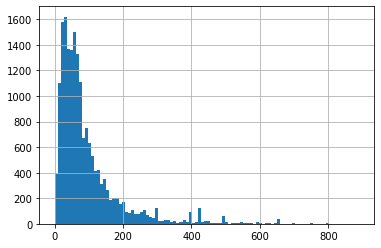

In [17]:
df['prices_amountmin'].hist(bins=100)

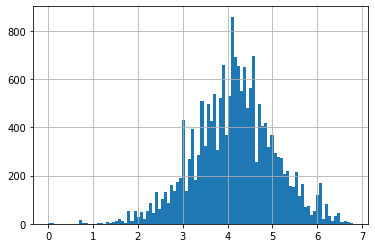

In [18]:
np.log1p(df['prices_amountmin']).hist(bins=100)

In [25]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean]* len(y_true)
mean_absolute_error(y_true, y_pred)

58.03539547661041

In [23]:
np.expm1(np.mean(np.log1p(y_true)))

62.92811169273113

In [26]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
model = DecisionTreeRegressor(max_depth=5)
feats = ['brand_cat']
def run_model(feads, model):
  X = df[feats].values
  y = df['prices_amountmin'].values
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [35]:
df['brand_cat'] =df.brand.map(lambda x: str(x).lower()).factorize()[0]
run_model(feats)

(-58.38655694633361, 4.223555478221712)

Manufacturer

In [0]:
df['manufacturer_cat'] =df.manufacturer.factorize()[0]

In [38]:
feats = ['manufacturer_cat', 'brand_cat']
run_model(feats)

(-58.53930419908596, 4.311223231615431)

In [59]:
model = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=0)
run_model(['brand_cat'], model)

(-57.31783843165656, 4.181246596160967)

In [57]:
df.head()

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight,brand_cat,manufacturer_cat
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,NaN,NaN,NaN,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,True,NaN,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN,0,-1
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,NaN,NaN,new,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,False,UnbeatableSale - Walmart.com,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN,0,-1
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,NaN,False,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,1,-1
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,NaN,False,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,1,-1
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZS

In [0]:
def parse_features(x):
  output_dict = {}
  if str(x) == 'nan': return output_dict
  features =  literal_eval(x.replace('\\"', '"'))
  for item in features:
    key = item['key'].lower().strip()
    value = item['value'][0].lower().strip()
    output_dict[key] = value
  return output_dict

df['features_parsed'] = df['features'].map(parse_features)

In [89]:
keys = set()
# type(df['features_parsed'][0])
df['features_parsed'].map(lambda x: keys.update(x.keys()))
len(keys)

476

In [93]:
def get_name_feat(key):
  return 'feat_'+key

for key in tqdm_notebook(keys):
  df[get_name_feat(key)] = df.features_parsed.map(lambda feats: feats[key] if key in feats else np.nan)

In [0]:
keys_stat = {}
for key in keys:
  keys_stat[key] = df[False == df[get_name_feat(key)].isnull()].shape[0] / df.shape[0]*100

In [108]:
{k: v for k, v in keys_stat.items() if v> 30}

{'brand': 48.62691466083151,
 'color': 47.784463894967175,
 'gender': 50.17505470459519,
 'manufacturer part number': 36.252735229759296,
 'material': 34.9070021881838}

In [0]:
df['feat_brand_cat'] =df['feat_brand'].factorize()[0]
df['feat_color_cat'] =df['feat_color'].factorize()[0]
df['feat_gender_cat'] =df['feat_gender'].factorize()[0]
df['feat_manufacturer part number_cat'] =df['feat_manufacturer part number'].factorize()[0]
df['feat_material_cat'] =df['feat_material'].factorize()[0]

In [120]:
df['brand'] = df['brand'].map(lambda x : str(x).lower())
df[df.brand == df.feat_brand][['brand', 'feat_brand']].shape


(8846, 2)

In [0]:
feats = ['brand_cat', 'feat_color_cat', 'feat_gender_cat', 'feat_manufacturer part number_cat', 'feat_material_cat']
results = run_model(feats, model)

In [128]:
X = df[feats].values
y = df['prices_amountmin'].values
print
m = RandomForestRegressor(max_depth=5, n_estimators=100)
m.fit(X, y)
perm = PermutationImportance(m, random_state=1).fit(X, y)
eli5.show_weights(perm, feature_names=feats)


Weight,Feature
0.2634 ± 0.0097,brand_cat
0.1077 ± 0.0130,feat_material_cat
0.0463 ± 0.0017,feat_gender_cat
0.0065 ± 0.0008,feat_manufacturer part number_cat
0.0062 ± 0.0015,feat_color_cat


(-57.314968455653755, 4.252646234394775)